# k Nearest Neighbors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

%matplotlib notebook

In [6]:
def draw_box(data, ax=None):
    """
    draw the bounding box of the data
    """
    ax = ax or plt.gca()
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    y_min, y_max = data[:, 1].min(), data[:, 1].max()
    ax.add_patch(plt.Rectangle(xy=([x_min, y_min]), 
                               width=x_max-x_min,
                               height=y_max-y_min, alpha=0.2))
    
    return

def partition_and_box(data, depth, order, border, ax=None):
    """
    Given the data as [n_sample, n_dim], we will partition the data 
    and draw the box. Here we are only dealing with 2D data
    
    border is in the format of [[x_min, x_max], [y_min, y_max]]
    """
    
    ax = ax or plt.gca()    
    # base case
    if depth == 0:
        # draw the box
        draw_box(data, ax=ax)
        return
    
    n_sample, n_dim = data.shape
    split_dim = order % n_dim
    # find the split value, here we will use mean
    split_val = data[:, split_dim].mean()
    
    # divide the data
    data_small = data[data[:, split_dim] < split_val]
    data_large = data[data[:, split_dim] >= split_val]
    
    # another base case
    if (data_small.shape[0] < 2 or data_large.shape[0] < 2):
        # draw the box on the original data
        draw_box(data, ax=ax)
        return
       
    # make the split line
    color = ['#2c9553', '#bde6de'][split_dim]   
    pts = np.array(border).T  # pivot to [[x1, y1], [x2, y2], ...]
    pts[:, split_dim] = split_val
    ax.plot(pts[:, 0], pts[:, 1], lw=5/1.2**order, c=color)
    
    # recursive calls
    border_small = deepcopy(border)  # need deepcopy!
    border_small[split_dim][1] = split_val   
    partition_and_box(data_small, depth-1, order+1, border_small)
    
    border_large = deepcopy(border)
    border_large[split_dim][0] = split_val
    partition_and_box(data_large, depth-1, order+1, border_large)
    
    return

def make_plots(data, depth, fig_num, query):
    plt.figure(fig_num)
    plt.scatter(data[:, 0], data[:, 1], s=80, lw=0, alpha=0.9)  # plot data
    plt.scatter(query[0], query[1], c='r', s=150, lw=0)
    plt.xlim([-35, 35]); plt.ylim([-35, 35])
    partition_and_box(data, depth, 0, [[-35., 35.], [-35., 35.]])   
    plt.title('Partition at depth of {}'.format(depth))

<IPython.core.display.Javascript object>


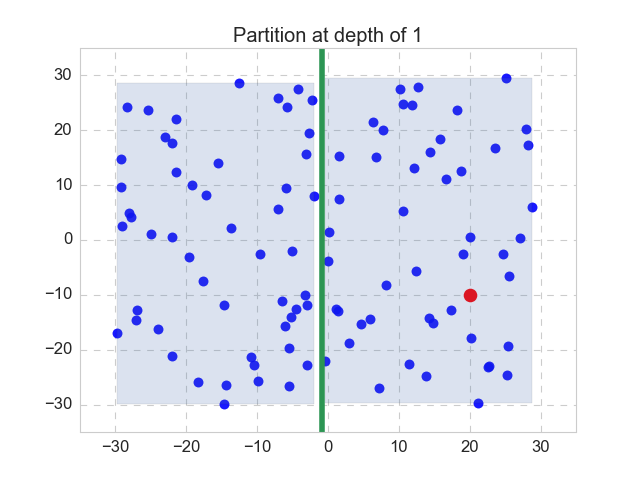

<IPython.core.display.Javascript object>


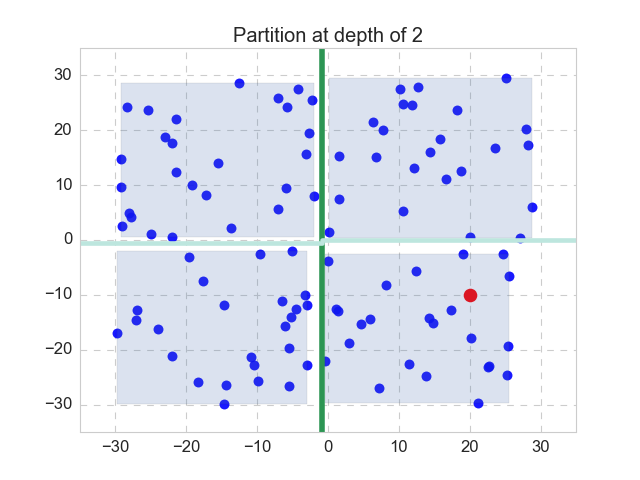

<IPython.core.display.Javascript object>


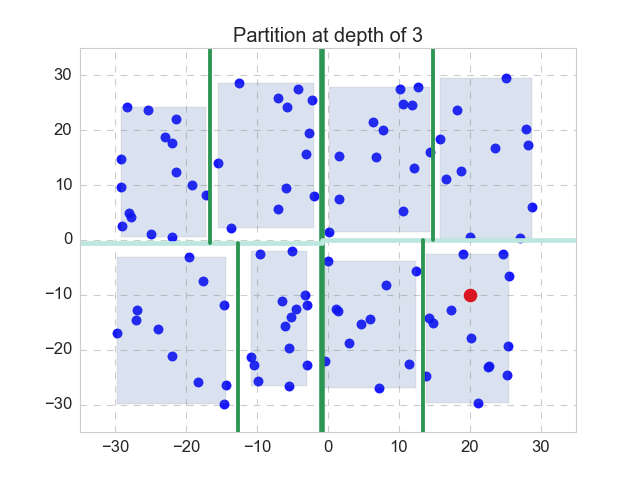

<IPython.core.display.Javascript object>


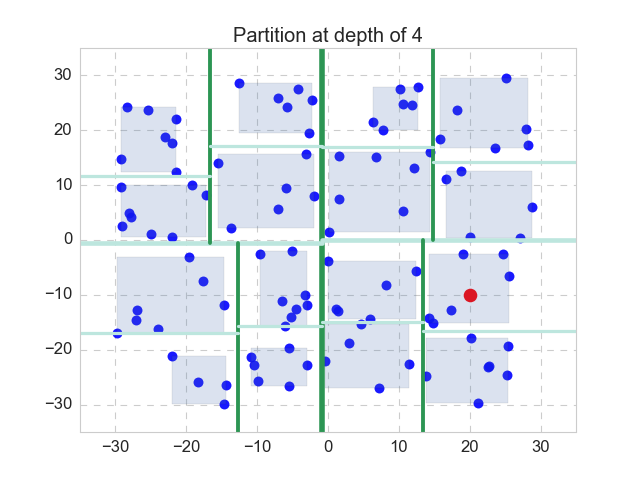

In [7]:
# test different partition level    
plt.close('all')
np.random.seed(40)
data = (np.random.rand(100, 2) - 0.5) * 60
query = [20, -10]

for i, d in enumerate(range(1, 5)):
    make_plots(data, d, i, query)